# Statistics notes

Using the textbook by Wild & Seber as a guide, I document some statistical lessons in this notebook. Some calculations are done with Python code. A baseball database is used in some cases for example data.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

# Code formatting
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# For importing example data
import sqlalchemy
import sqlalchemy_utils
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [3]:
# Define a database name
# Set your postgres username
dbname = "baseball"
username = "lacar"  # change this to your username

# Working with PostgreSQL in Python
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database=dbname, user=username)

# Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine("postgres://%s@localhost/%s" % (username, dbname))
print(engine.url)

postgres://lacar@localhost/baseball


In [4]:
# Use players with 100 ab, randomly ordered
sql_query = """
SELECT * FROM batting_stats
WHERE "AB" > 100
ORDER BY RANDOM();
"""
df_query = pd.read_sql_query(sql_query,con)
print(df_query.shape)
df_query.head()

(1301, 288)


,index,Season,Name,Team,Age,G,AB,PA,H,1B,...,wSL/C _pi,wXX/C _pi,O-Swing_perc _pi,Z-Swing_perc _pi,Swing_perc _pi,O-Contact_perc _pi,Z-Contact_perc _pi,Contact_perc _pi,Zone_perc _pi,Pace _pi
0,1363,2018.0,Austin Dean,Marlins,24.0,34.0,113.0,122.0,25.0,17.0,...,-0.60,NaN,0.307,0.577,0.438,0.750,0.874,0.829,0.486,23.7
1,1046,2018.0,Albert Almora Jr.,Cubs,24.0,152.0,444.0,479.0,127.0,97.0,...,-0.85,NaN,0.411,0.694,0.543,0.604,0.884,0.771,0.467,24.0
2,239,2017.0,Domingo Santana,Brewers,24.0,151.0,525.0,607.0,146.0,87.0,...,2.48,9.30,0.273,0.686,0.462,0.496,0.797,0.700,0.458,22.3
3,538,2018.0,George Springer,Astros,28.0,140.0,544.0,620.0,144.0,96.0,...,0.08,6.35,0.234,0.665,0.444,0.599,0.847,0.780,0.487,25.1
4,304,2019.0,Cameron Maybin,Yankees,32.0,82.0,239.0,269.0,68.0,40.0,...,-0.01,NaN,0.239,0.628,0.419,0.535,0.818,0.731,0.462,23.9


In [5]:
# Pick data by looking at which are normally distributed
# Looking at Shapiro-Wilk test - this is like taking the slope of a Q-Q plot https://www.youtube.com/watch?v=dRAqSsgkCUc
from scipy.stats import shapiro

for col in df_query.columns:
    try:
        stat, p = shapiro(df_query[col])
        if (p > 0.05) & ('perc' not in col):
            print(stat, p, col)
    except:
        continue

0.9978616833686829 0.08872227370738983 SLG
nan 1.0 Fld
nan 1.0 phLI
nan 1.0 SFv
nan 1.0 KNv
nan 1.0 wSF
nan 1.0 wKN
0.9982969760894775 0.2179788202047348 wFB/C
nan 1.0 wSF/C
nan 1.0 wKN/C
nan 1.0 vFS _pfx
nan 1.0 vFO _pfx
nan 1.0 vKC _pfx
nan 1.0 vEP _pfx
nan 1.0 vSC _pfx
nan 1.0 vKN _pfx
nan 1.0 FS-X _pfx
nan 1.0 FO-X _pfx
nan 1.0 KC-X _pfx
nan 1.0 EP-X _pfx
nan 1.0 SC-X _pfx
nan 1.0 KN-X _pfx
nan 1.0 FS-Z _pfx
nan 1.0 FO-Z _pfx
nan 1.0 KC-Z _pfx
nan 1.0 EP-Z _pfx
nan 1.0 SC-Z _pfx
nan 1.0 KN-Z _pfx
nan 1.0 wFS _pfx
nan 1.0 wFO _pfx
nan 1.0 wKC _pfx
nan 1.0 wEP _pfx
nan 1.0 wSC _pfx
nan 1.0 wKN _pfx
0.999442458152771 0.9780756831169128 wFA/C _pfx
nan 1.0 wFS/C _pfx
nan 1.0 wFO/C _pfx
nan 1.0 wKC/C _pfx
nan 1.0 wEP/C _pfx
nan 1.0 wSC/C _pfx
nan 1.0 wKN/C _pfx
nan 1.0 vCS _pi
nan 1.0 vFS _pi
nan 1.0 vKN _pi
nan 1.0 vSB _pi
nan 1.0 vXX _pi
nan 1.0 CS-X _pi
nan 1.0 FS-X _pi
nan 1.0 KN-X _pi
nan 1.0 SB-X _pi
nan 1.0 XX-X _pi
nan 1.0 CS-Z _pi
nan 1.0 FS-Z _pi
nan 1.0 KN-Z _pi
nan 1.0 SB-Z _

In [6]:
df_query['SLG'].head(10)

0    0.363
1    0.378
2    0.505
3    0.434
4    0.494
5    0.540
6    0.343
7    0.444
8    0.445
9    0.346
Name: SLG, dtype: float64

## Some markdown notations

[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

$\bar{x}$
$\pm$
$2se(\bar{x})$

= 5.447931 $\pm$ 2 x 0.04102858 = 5.447931 $\pm$ 0.08205717

$\bar{x}$
$\bar{X}$
$se(\bar{x})$ = 

$\frac{s_X}{\sqrt(n)}$ = $\frac{0.22094577}{\sqrt29}$ 
$\mu$
$\hat{p}$
$\hat{P}$


# (Ch. 7) Sampling Distributions of Estimates

- Pivotal chapter! This chapter lays the foundations for all of the discussion about estimation that follows!
- Focus for the remainder of the book is how to use sampled data to inform us about the population from which data are drawn.

## (7.1) Parameters and Estimates

Random or unpredictable data can arise in two ways:
1. The randomness associated when sampling from a larger population (e.g. sampling the heights of a randomly chosen group of men to estimate all men)
2. A random process production in which case the underlying population is more conceptual than real (e.g. taking a set of computer chips to determine malfunctioning rate to estimate rate of all produced chips)

Parameter vs. Estimate:
- Parameter: A numerical characteristic of a population or distribution (e.g. the population mean E(*X*) or $\mu$, population standard deviation sd(*X*) or $\sigma$, and population proportions). In practice, we usually know very little about the population we are sampling (hence one of the reasons for collecting data from the population).

- Estimate: A quantity calculated from the data of an unknown parameter (e.g. take the sample mean $\bar{x}$as an *estimate* of the population mean $\mu$, or the sample proportion $\hat{p}$ as an *estimate* of *p*).

**Q: What are the symbols for population mean and sample mean? Population proportion and sample proportion? Population sd and sample sd?**

If you take multiple samples (draws) from a population, how well do the estimates (like a sample mean) match the population mean? The chapter is understanding the sample variation.


### Capital Letters and Small Letters: Estimates and Estimators

- Capital letters refer to random variables (and applicable to samples!).
    - The estimator
    - When we want to think about the way the sampling process behaves
- Small letters refer to observed values.
    - The estimate
    - When we want to discuss what we actually saw when we collected the data

Example: Imagine we're talking about the proportion of people in a sample who are vaccinated. The sample proportion can be referred to in two ways:
- $\hat{P}$ (capital): Thinking about the effects of sampling variation or the random variability involved in the process of taking a sample and obtaining a sample proportion.
- $\hat{p}$ (small): What we actually saw (0.26 of our sample had been vaccinated).

The distinction in the context of estimation lets us talk about the actual number observed (the estimate) versus the abstraction that lets us think about the properties of the random process that produces the estimate (the estimator).

### Quiz questions
1. **Describe two ways in which random observations arise and give examples.**
2. **What is a parameter? Give two examples of parameters.**
3. **What is an estimate? How would you estimate the parameters you described in question 2?**
4. **What is the distinction between an estimate and an estimator? Why is it made? What notational device is used to communicate the distinction?**

## (7.2) Sampling Distribution of the Sample Mean

### Means of Random Samples

One way to estimate the population mean is to take multiple sample measurements and average them. For example, you can estimate pH of a chemical buffer solution by taking 7 measurements and averaging them. But how accurate is the estimate of the true population mean? We can use code to investigate the behavior of the proces of taking random samples and using the resulting sample mean $\bar{x}$ as an estimate of $\mu$. What we will be observing is the behavior of the **sampling variation** in values of $\bar{x}$.

Let's imagine that we'll evaluate the average slugging percentage of the baseball dataset (1,301 players with at least 100 ab). Here are the first 6 players slugging percentage (SLG).

In [122]:
print(df_query['SLG'].iloc[0:6])

0    0.330
1    0.428
2    0.292
3    0.312
4    0.366
5    0.447
Name: SLG, dtype: float64


Here's the mean:

In [123]:
print('Average age: ', "{:.4f}".format(df_query['SLG'].iloc[0:6].mean()))

Average age:  0.3625


Let's take another 6 players.

In [124]:
print(df_query['SLG'].iloc[6:12])

6     0.629
7     0.530
8     0.375
9     0.379
10    0.364
11    0.292
Name: SLG, dtype: float64


Here's the mean of the second set of 6 players:

In [125]:
print('Average age: ', "{:.4f}".format(df_query['SLG'].iloc[6:12].mean()))

Average age:  0.4282


In [126]:
def create_dot_plots(metric, sample_size, n_draws):
    sns.set(context='talk')
    f, ax1 = plt.subplots(figsize=(8,6))
    for i in range(n_draws):
        ax1.scatter(df_query[metric].iloc[i*sample_size:i*sample_size+sample_size], [i+1]*sample_size, facecolors='none', edgecolors='k')
        ax1.scatter(df_query[metric].iloc[i:i+sample_size].mean(), [i+1], marker='+', color='r')
    ax1.set_xlabel(metric)
    ax1.set_ylabel('draw number')
    ax1.set_title(str(n_draws) + ' draws of size n=' + str(sample_size))

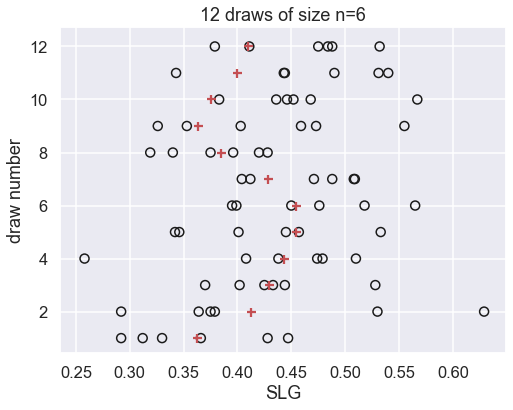

In [127]:
create_dot_plots('SLG', sample_size=6, n_draws=12)

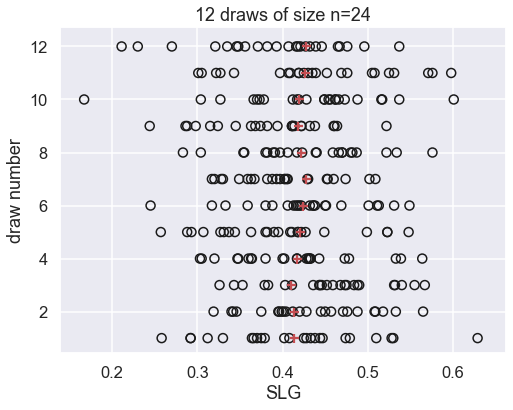

In [128]:
create_dot_plots('SLG', sample_size=24, n_draws=12)

Note that each sample mean is different and will vary in an unpredictable way. Furthermore, as sample size is increased from 6 to 24, you can see the decrease in variability of the sample means.

In [129]:
def get_array_of_sample_means(metric, sample_size, n_draws):
    sample_means = list()
    for i in range(n_draws):
        sample_means.append(df_query[metric].sample(sample_size).mean())
    return sample_means

Denote the sample mean of X-measurements, thought of as a random variable by $\bar{X}$. See below how sample size is increased and the variance and SD decrease.

In [145]:
sample_array_n6 = get_array_of_sample_means('SLG', 6, 1000)
sample_array_n24 = get_array_of_sample_means('SLG', 24, 1000)
sample_array_n100 = get_array_of_sample_means('SLG', 100, 1000)

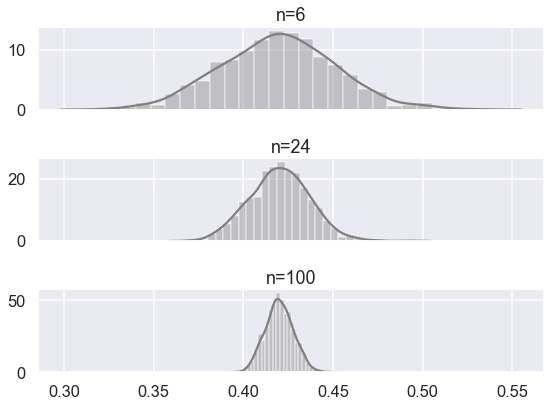

In [161]:
sns.set(context='talk')
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,6), sharex=True)

sns.distplot(sample_array_n6, kde=True, ax=ax1, color='gray')
ax1.set_title('n=6')
sns.distplot(sample_array_n24, kde=True, ax=ax2, color='gray')
ax2.set_title('n=24')
sns.distplot(sample_array_n100, kde=True, ax=ax3, color='gray')
ax3.set_title('n=100')

plt.tight_layout()

**Theory**

Suppose $X_1$, $X_2$,... $X_n$ is a random sample from a distribution (not necessarily normal) with population mean $\mu$ and population standard deviation $\sigma$.

The **sample mean** is therefore:
<br>
$\Sigma$($X_1$, $X_2$,... $X_n$)/n = E(sample mean) = $\mu_\bar{X}$ = E($\bar{X}$) = population mean

The **sample standard deviation** is:
<br>
 sd(sample means) = sd($\bar{X}$) = $\sigma_\bar{x}$ =  population SD / $\sqrt n $  = $\frac{\sigma}{\sqrt n }$ 
 
 *Note the similarity to the formula for standard error (to be discussed down below). In most cases, we do not know the population SD, hence the substitution of sample SD in the standard error equation.*
 

Since the estimate for the expected mean is equal to the population mean, we call the estimate *unbiased*.
One way to think about the standard deviation is that it is the variability of individual observations divided by $\sqrt{n}$. Due to the denominator of this term, for a given sampling, reducing the variability by a factor of two (that is one-half of sd($\bar{X}$) requires 4x as many samples and reducing the variability by three (one-third of sd($\bar{X}$) requires 9x as many samples.


If *X* measurements in the population actually come from a Normal distribution, then the sampling distribution of $\bar{X}$ is also Normal. The ample mean will fall within two standard deviations of the population mean 95% of the time. This suggests that sd($\bar{X}$) might be a useful measure of the "precision" of the sample mean as an estimate.

We have seen that when sampling from a Normal distribution, $\bar{X}$ is also Normally distributed. It follows then that:
<br>
**Z = ($\bar{X}$ - $\mu$)/sd($\bar{X}$) ~ Normal(0,1)**
<br>
This is an important equation that we will return to later.


#### Quiz questions [fill in later]

1. We use both 

#### Exercises

1. **Suppose that for a given sample size of 10, sd($\bar{X}$) = 9. How many more observations would we need to take to reduce sd($\bar{X}$):**
    - to 4.5?   *Cutting the variability by 2 means we need 2$^2$ (4) times as many samples. We therefore need a total of 10x4 (40), so we need an additional 30 samples.*
    - to 3?     *Cutting the SD by a factor 3 means we need $3^2$ (9) times as many samples. We therefore need a total of 10x9 (90 samples), so we need an additional 80 samples.*
    - to 1?     *Cutting the SD by a factor of 9 means we need 9$^2$ (81) times as many samples. We therefore need a total of 10x81 (810 samples), so we need an additional 800 samples.*
    
2. **The annual dividend paid by a large public company is calculated on the** (to be finished) 

### The Central Limit Effect

Previously, we saw that for Normally distributed data, the distance between $\bar{x}$ and $\mu$ is within 2sd($\bar{X}$) and sd($\bar{X}$) looks like it be a useful measure of the precision of our estimate $\bar{x}$. However, this has little practical value:
- nobody *knows* that their data are coming from a Normal distribution
- the value of sd($\bar{X}$) = $\sigma/\sqrt{n}$ depends on the population standard deviation and nobody knows that in practice either!

But what about the shape of the distribution of the sample mean $\bar{X}$?

If you make 5000 draws of size *n* and then averaged each draw to get 5000 sample means, you will get a normal distribution as you increase *n*, especially as *n* > 25. This will happen *regardless of the distribution shape* from the population you are drawing from (e.g. triangular, exponential, uniform, quadratic). This applies to discrete distributions as well.

**Central limit theorem:** $\bar{X}$ is approximately Normally distributed in large samples.

CLT works faster the closer the original distributions are to normal. It works more slowly when distributions have a heavy tail and are asymmetric.


#### Quiz questions [fill in]

#### Exercises

1. A Japanese importer... (tbd)

2. Service times for customers coming through a checkout counter in a supermarket are independent random variables with an expected value of 3.1 minutes, a standard deviation of 1.2 minutes, and a distribution that is *not* Normal. A random sample of 50 customers is selected.

    - What is the approximate probability that the average service time for these 50 customers is less than 3.3 minutes?
    - What is the approximate probability that the total service time for these 50 customers is less than 2.5 hours?

Question 2a.
The population are all the customers coming through the checkout counter. Therefore, we can say the population mean and SD is 3.1 and 1.2 minutes, respectively. By taking a random sample of 50 customers, we can apply CLT and the properties of a Normal distribution.

We want to find the cumulative distribution that is less than 3.3 minutes.

In [174]:
sample_sd = 1.2/np.sqrt(50)
sample_sd

0.1697056274847714

In [175]:
from scipy.stats import norm
norm.cdf(x=3.3, loc=3.1, scale=sample_sd)

0.880703585341782

The probability that the *average* service time for these customers is less than 3.3 minutes is 88.1%. (answer confirmed correct)

Question 2b.
For a total, we will take the average total time for all customers:
<br>
avg_total_time = 3.1 minutes x 50 = 155 minutes
<br>
*I was not 100% sure about this next step but this turns out to be correct.*
To get the standard deviation of the total time, we first scale the SD to account for the number of people:
<br>
popSD_total_time = 1.2 minutes x 50 = 60 minutes
<br>
Then take that divided by the square root of the sample size to get sample SD.
<br>
sampleSD_total_time = 60 / $\sqrt{50}$ = 8.485 min
<br>


We then apply CLT to apply properties of a normal distribution to find the probability that the 50 customers served will take under 2.5 hours (150 minutes).

In [10]:
sampleSD_total_time = 60/np.sqrt(50)
print(sampleSD_total_time)

8.48528137423857


For population SD, why can't we add variances then take the square root?
Two reasons: one is that these aren't independent random variables(?) and two is that we're not summing only two of them. (Taking the 50th root also doesn't give the right answer.)

In [177]:
norm.cdf(x=150, loc=155, scale=sampleSD_total_time)

0.2778448951413973

There is a 27% probability of serving the customers in <= 2.5 hours.
(answer confirmed correct)

### Introducing the Standard Error

As mentioned above, we can theoretically calculate the variability from sample to sample in sample means sd($\bar{X}$). However, this is not easy to do in practice since sd($\bar{X}$) depends on $\sigma$, the population standard deviation which is often unknown. Instead, we substitute by using the variability of individual observations taken from the sample, the sample standard deviation, $s_X$. This gives us an estimate of sd($\bar{X}$):

The standard error of the sample mean = $\frac{sample SD}{\sqrt{sample size}}$

$se(\bar{x})$ = $\frac{s_X}{\sqrt{n}}$


We saw above that ($\bar{X}$ - $\mu$)/sd($\bar{X}$) is approximately Normal(0,1) but so is ($\bar{X}$ - $\mu$)/se($\bar{X}$). We now have a metric that can measure the precision of our sample mean. The three implications of situations where we have taken a random sample and obtained a value of $\bar{x}$ from our data.

1. se($\bar{x}$) is a measure of the precison of $\bar{x}$ as an estimate of $\mu$, which is useful in practice.
2. If we want to estimate the true value of $\mu$, we can be reasonably safe it relies within 2se($\bar{x}$) of $\bar{x}$. (This sets us up for interval estimation and confidence intervals.)
3. We'll be suspicious of any theoretical value for $\mu$ that is more than 2se($\bar{x}$) away from $\bar{x}$. (This sets us up for hypothesis testing.)

**Example** Two-standard-error interval for mean density of the Earth

Cavendish made 29 mean density measurements. He found:

sample mean = $\bar{x}$ = 5.447931 g/cm$^3$
<br>
sample standard deviation = 0.22094577
<br>
sample standard error = $se(\bar{x})$ = $\frac{s_X}{\sqrt{n}}$ = $\frac{0.22094577}{\sqrt{29}}$ = 0.04102858

Therefore, it's a safe bet that the true mean density $\mu$ was within 2 standard errors of the sample mean:

$\bar{x}$ $\pm$ $2se(\bar{x})$ = 5.447931 $\pm$ 2 x 0.04102858 = 5.447931 $\pm$ 0.08205717

*Formulating things this way is like item (2), an example of* interval estimation, *a range of values that we think will contain the true value of the parameter we're trying to estimate ($\mu$ in this case). A more sophisticated form of interval estimation is* confidence intervals *which will be introduced later.*

Suppose that a theorist had proposed a mean density of 5.7, which is more than six standard errors away from the data estimate $\bar{x}$ from Cavendish. If we trusted Cavendish, this would make us believe that the theorist is wrong.

*Stating things this way is like item(3), a simple introduction and formulation of* hypothesis testing, *which will be discussed later.*

#### Quiz questions

1. Why is the standard deviation of $\bar{X}$, sd($\bar{X}$), not a useful measure of the precision of $\bar{X}$ as an estimator in practical applications? what measure of precision do we use in practice?

(others)

#### Exercises

(add questions 1 and 2)

3. Suppose the daily rates charged by a random sample of 40 Seattle builders had a sample mean of `$`250 and a sample standard deviation of `$`50. In what range of values is the average daily rate of all Seattle buliders likely to lie?


In [99]:
n = 40
s_mean = 250  # sample mean
s_sd = 50     # sample standard deviation
s_se = s_sd/np.sqrt(n)      # standard error of the sample mean

# The true mean will like within two standard errors of the sample mean 95% of the time.
lower_bound = s_mean - 2*s_se
upper_bound = s_mean + 2*s_se

print("Range of values: ", lower_bound, upper_bound)
# answer confirmed as correct

Range of values:  234.18861169915812 265.8113883008419


## (7.3) Sampling Distribution of the Sample Proportion

### Sample proportions and their standard errors

**Example** Proportion of teens witnessing drugs being sold at school.
As part of a 1998 survey, 1000 US teenagers aged between 12 and 17 were interviewed by phone on a variety of issues. 27% of the teens reported having seen illegal drugs sold at their schools.

We shouldn't take this one example too literally. We should really think about how this is just one sample and how another sample could give a different proportion. In other words, there will be variation in the sample proportion. Taking a random sample and observing a sample proportion is a random process.

$\hat{p}$ = the sample proportion from the sample we actually take (0.27 in the above example)

$\hat{P}$ = the corresponding random variable

The distribution of $\hat{P}$ tells us about the random variability in the process of taking a sample and observing a sample proportion. This gives us some information about the quality of the estimate we obtained from out data. The theory that we will develop applies both to random samples from a process and simple random samples from large populations.

Let's define ${Y}$ as the number of individuals with a given characteristic. When taking a SRS from a large population, the distribution of ${Y}$ is approximately Binomial(${n,p}$).

- n: sample size (the number of "tosses")
- p: the probability of getting a "head" on any particular "toss"

(This assumption is reasonable when p is $\leq$ 0.5.)

**The sample proportion $\hat{p}$ estimates the population proportion ${p}$.**




Let's imagine that we want to visualize the distribution for the number of individuals having a certain genetic mutation (they have it or they don't) when the proportion is 40% of the population and we sample 200 individuals. Naturally, we'd expect (0.4 x 200 =) 80 individuals to be most likely and therefore 80 is our expected value. But what about the variation? What kind of values can we expect each time we sample this distribution? For a binomial distribution, sd = $\sqrt{np*(1-p)}$.

For a binomial distribution:

mean_binomial = n*p
<br>
sd_binomial = $\sqrt{np*(1-p)}$

In other words, it is like taking 200 coin tosses and counting the number of times heads comes up. Each "sample" is then the outcome of these 200 tosses. What do the sampled values look like?

In [40]:
# Let's generate ten outcomes based on sampling this distribution
n = 200
p = 0.4
print('What 10 samples look like: ', binom.rvs(n, p, size=10))

What 10 samples look like:  [76 80 77 83 85 88 82 85 82 82]


Bonus:
- How does variability (standard deviation) vary with **p**? (Assume n=10.)
- How does variability (standard deviation) vary with **n**? (Assume p = 0.5)

In [35]:
from scipy.stats import binom

In [77]:
# Varying p, constant n
p_array = np.arange(0, 1.05, 0.05)
sd_binom_array = list()
for p in p_array:
    n = 10
    sd_of_p = np.sqrt(n*p*(1-p))
    sd_binom_array.append(sd_of_p)
    
# Varying n, constant p
n_array = np.arange(0, 200, 5)
sd_binom_array_n = list()
for n in n_array:
    p = 0.5
    sd_of_n = np.sqrt(n*p*(1-p))
    sd_binom_array_n.append(sd_of_n)

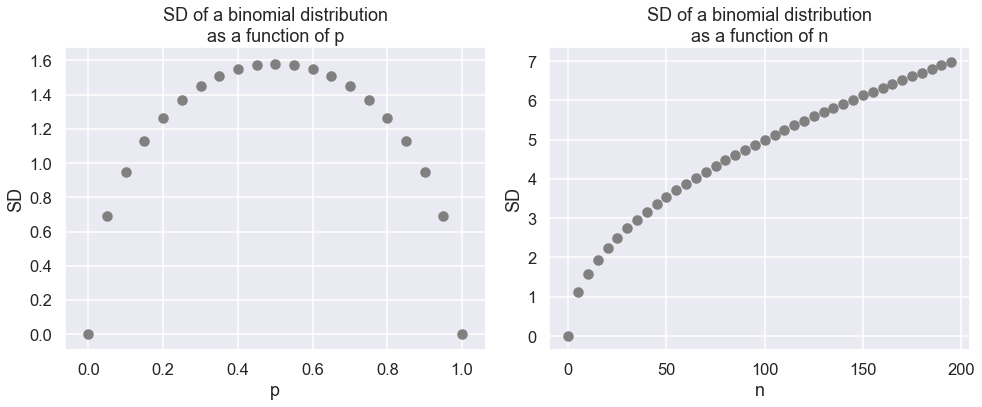

In [78]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.scatter(p_array, sd_binom_array, color='gray')
ax1.set_title('SD of a binomial distribution\nas a function of p')
ax1.set_xlabel('p')
ax1.set_ylabel('SD')

ax2.scatter(n_array, sd_binom_array_n, color='gray')
ax2.set_title('SD of a binomial distribution\nas a function of n')
ax2.set_xlabel('n')
ax2.set_ylabel('SD')

plt.tight_layout()

When the probabilities are closer to 0.5 the variability is largest. This makes intuitive sense. If you are trying to see if a coin is unfair, an unbiased coin is more likely to "show" it's unbiased with fewer tosses. With a fair coin, a broader range of outcomes is more probable.

For n, it's interesting that the variability increases fastest with smaller sample sizes and then the rate appears to slow or get more consistent. This is because of the square root term. There is a bigger difference going from 5 to 10 after taking a square root then going from 50 to 55.

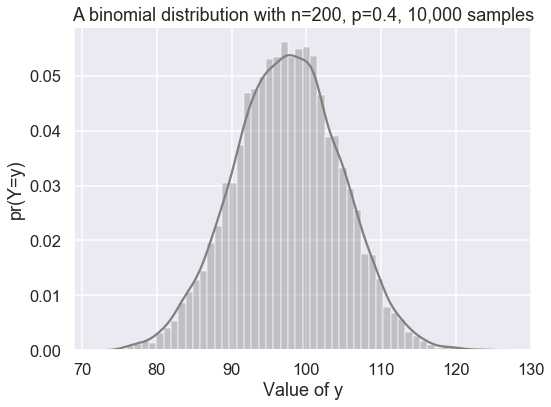

In [92]:
# Let's generate more random numbers for plotting
binom_1000 = binom.rvs(n, p, size=10000)

sns.set(context='talk')
f, (ax1) = plt.subplots(1, 1, figsize=(8,6), sharex=True)

sns.distplot(binom_1000, kde=True, ax=ax1, color='gray')
ax1.set_title('A binomial distribution with n=200, p=0.4, 10,000 samples')
ax1.set_xlabel('Value of y')
ax1.set_ylabel('pr(Y=y)')

plt.tight_layout()

You can see that the binomial distribution curve approximates a Normal distribution as n gets larger.

Therefore, $\hat{P}$ the sample proportion is simply Y/n and is also approximately Normal under the same conditions. It can be shown that this is a consequence of CLT.

For large samples, the distribution of $\hat{P}$ is approximately Normal with

mean = p (population proportion)
<br>
standard deviation = $\sqrt{\frac{p(1-p)}{n}}$

However, since we often do not know the population proportion in practice, we substitute the sample proportion, $\hat{p}$.

**Standard error of the sample proportion**:

$se(\hat{p})$  = $\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$

We can use $\hat{p}$ and $se(\hat{p})$ to tell us about the true value of p exacly the same way as we used $\bar{x}$ and $se(\bar{x})$ to tell us about the true value of the population mean $\mu$.

**Example**: Two-standard-error interval
    
Going back to the teen poll example, if the sample value is 0.27, how big is the true population proportion p likely to be? We can find the interval that is within two standard errors.

$se(\hat{p})$ = $\sqrt{\frac{\hat{p}(1-\hat{p}}{n}}$ = $\sqrt{\frac{0.27*0.73}{1000}}$ = 0.014039

p is therefore within two standard errors of $se(\hat{p})$ or

0.27 $\pm$ 2*0.014039 or between 0.24 and 0.30

#### Quiz questions

(others, 6 total)

6. Under what conditions is the formula $se(\hat{p})$ = $\sqrt{\frac{\hat{p}(1-\hat{p}}{n}}$ applicable?


#### Exercises

(4 questions in total)

3. In the 1998 survey mentioned above, 825 US teachers were sampled. Of these, 48% believed they had received adequate training about how to spot substance abuse in their students. This is a sample value and thus subject to sampling variation. If someone was claiming that the majority of teachers believe they have had sufficient training, would the data prove them wrong?

    - One way to address this it determine the probability of getting the majority (greater than 50%) of teachers receiving training based on the sample proportion we obtained.
    - Our estimate for the population proportion is our sample proportion $\hat{p}$ = 0.48.
    - Our standard error of the sample proportion is $se(\hat{p})$ = $\sqrt{\frac{\hat{p}(1-\hat{p}}{n}}$ = $\sqrt{\frac{0.48*0.52}{825}}$ = 0.01739
    - Our interval for the true value of p is within two standard errors of $\hat{p}$:
        0.48 $\pm$ 2*0.01739 which is 0.445 and 0.515.
       
    - Since the interval contains values greater than 0.50, it is plausible for the person to claim that the majority of teachers have received training. No, the data would not prove this person wrong. (answer confirmed)
    

In [97]:
# Calculations for problem 3
se_of_sample_prop = np.sqrt((0.48*0.52)/825)
print('Standard error of sample proportion: ', se_of_sample_prop)

interval_prop = (0.48-2*0.01739, 0.48+2*0.01739)
print('Two standard error interval of sample proportion: ', interval_prop)

Standard error of sample proportion:  0.017393833808147487
Two standard error interval of sample proportion:  (0.44522, 0.51478)


### Some Asides about Polling

You **don't** need a larger sample when sampling from a huge population (the entire US) versus a small town. (This is a common misconception about sampling). All that matters is that it is random. 

The Binomial-based theory of the previous subsection is an adequate approximation for sampling *without* replacement from a real population when the sample size n is smaller than about 10% of the population size N. (This is satisifed for almost any real sampling.) The sample size n matters while the size of the population N is almost irrelevant. The key is that everyone has the same chance of being selected, which is harder to do in practice in large ppoulations. Taking larger samples doesn't fix the nonsampling errors such as selection bias.

Public opinion polls are a form of two-stage cluster sampling.
First stage: Divide the population into clusters like towns or counties then randomly choose those clusters.
Second stage: Randomly select individuals within those clusters.

Errors typically quotd in the media from poll results are only appropriate for random sampling. The formula for $se(\hat{p})$ underestimate the errors in cluster samples and sometimes it can be severe.

Another source of confusion in opinoin polls is the tendency in the media to quote a single measure of error as though it applies univerally to all estimates calculated from the poll. The $se(\hat{p})$ will vary with $(\hat{p})$ as shown above.

Remember that sources of error can be both sampling errors (sampling variation) and also nonsampling errors.

#### Quiz questions (4)

2. Are public opinion polls involving face-to-face interviews typically simple random samples?


## (7.4) Estimates that are approximately Normal

Recall the definition of *parameters* and *estimates*. There are uniform ways of operating with the different estimates. We can apply theta notation:

| category | parameter | estimate  | random variable |
|----------|-----------|----------|----------|
| arbitrary | $\theta$ | $\hat{\theta}$  | $\hat{\Theta}$  |
|  mean | $\mu$ | $\bar{x}$  | $\bar{X}$  |
| proportion | ${p}$ | $\hat{p}$ | $\hat{P}$  |

By identifying the estimate and its associated parameter, we can make general results to specific situations.
<br>
**statistical inference**: The process of using sample data to make useful statements about an unknown parameter $\theta$.

Capital theta, $\hat{\Theta}$, is the random variable corresponding to the values of $\hat{\theta}$ we actually obtain. This is in alignment for referring to the properties of the estimation with capital letters (the random variable).


### Bias, precision, and accuracy

Properties of a good estimator:
-  **low bias**: Want the estimate E($\bar{X}$) = $\mu$ and E($\hat{P}$) = $p$ as much as possible (the estimator $\hat{\theta}$ is concentrated as closely as possible to the true value of the parameter $\theta$). Typically, the estimators described in the book are unbiased.
- **high precision**: Low variability of the estimator in repeated sampling. We want to use the standard deviation of the sampling distribution of the estimator (sd($\hat{\Theta}$) but this requires knowing the population sd which we don't know in practice. That is why we use the standard error (se($\hat{\theta}$) as our measure of precision.

| category | parameter | estimate  | \*practical measure<br>of precision | formula for measure <br>of precision (se) |
|----------|-----------|----------|----------|----------|
| arbitrary | $\theta$ | $\hat{\theta}$  | se($\hat{\theta}$) |  | 
|  mean | $\mu$ | $\bar{x}$  | se($\bar{x}$) | $\frac{s_x}{\sqrt{n}}$ |
| proportion | ${p}$ | $\hat{p}$ | se($\hat{p}$) | $\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ |

\*Ideally we would use the population standard deviation to determine the measure of precision. However, a population SD is often unknown. We substitute the sample standard deviation ($s_x$ and in real-life to generate a "practical" measure of precision.

### Interval estimates

This is applying the idea that we can use our estimate and the standard error to find the interval that captures the true population parameter (e.g. the interval within two standard errors of our estimate captures the parameter ~95% of the time). This is because ($\hat{\Theta}$-${\theta}$)/se($\hat{\Theta}$ is approximately Normal(0,1) in large samples.

| category | parameter | estimate  | interval estimate (~95%)|
|----------|-----------|----------|----------|
| arbitrary | $\theta$ | $\hat{\theta}$  | $\hat{\theta} \pm 2se(\hat{\theta}$)  |
|  mean | $\mu$ | $\bar{x}$  | $\bar{x} \pm 2se(\bar{x}$)  |
| proportion | ${p}$ | $\hat{p}$ | $\hat{p} \pm 2se(\hat{p}$) |

Implications of knowing the relationship of our estimate and our parameter based on the standard error:
1. Estimating the true value of a parameter $\theta$ by saying it is in the range of the estimate $\pm$ 2 standard errors is a safe bet. *This is a gentle introduction to the idea of a* confidence interval.
2. The data provide evidence *against* any theory that specifies a value of a parameter that is more than two standard errors from our data estimate. *This is a gentle introduction to the idea of a* test of significance.

More sophisticated discussions of these ideas will be discussed later.

In [1]:
import numpy as np

In [3]:
t_stat = [2.776, 2.571, 2.447, 2.365, 2.306]

In [15]:
for t, i in enumerate([4,5,6,7,8]):
    se_diff = np.sqrt((0.5**2)/i + (0.25*0.75)/i)
    #print(se_diff)
    print(i, t_stat[t], 0.25 - t_stat[t]*se_diff, 0.25 + t_stat[t]*se_diff)

4 2.776 -0.6680757049394129 1.168075704939413
5 2.571 -0.5105120561174556 1.0105120561174556
6 2.447 -0.410765520375168 0.910765520375168
7 2.365 -0.34125000000000005 0.84125
8 2.306 -0.28926637086879425 0.7892663708687943


In [2]:
for t, i in enumerate([4,5,6,7,8]):
    se_diff = np.sqrt((0.5**2)/i + (0.25*0.75)/i)
    #print(se_diff)
    print(i, 1.96, 0.25 - 1.96*se_diff, 0.25 + 1.96*se_diff)

4 1.96 -0.3982090712108247 0.8982090712108247
5 1.96 -0.3297758187437624 0.8297758187437624
6 1.96 -0.27926049036997513 0.7792604903699751
7 1.96 -0.24 0.74
8 1.96 -0.2083530298798078 0.7083530298798077


In [17]:
(1.96**2*(0.5**2))/0.25

3.8415999999999997

I followed this 

In [ ]:
# Using pooled standard deviation
for t, i in enumerate([4,5,6,7,8]):
    sp = np.sqrt((0.5**2)/i + (i-1)

    #print(se_diff)
    print(i, t_stat[t], 0.25 - t_stat[t]*se_diff, 0.25 + t_stat[t]*se_diff)
    

### How many significant figures?

When presenting answers, do not show unnecessary detail and in general use common sense. A rule of thumb is to show the estimate's decimal place of the *first significant figure* of the standard error.

Example: Suppose our calculations give an estimate of 1.5436 and standard error of 0.06923. The first significant figure in the standard error is the 6 (the hundreths place). Therefore, suggested presentation would show estimate of 1.54 and standard error of 0.069.

For interval estimates, show the bounds with one more significant figure than the order of magnitude of the width. For example, a calculated interval might have bounds of (23.76, 45.12). (Show it as 24, 45).

### Quiz on Section 7.4

1. Describe what is meant by the terms parameter and estimate.
    - A parameter represents a characteristic of the population which is typically unknown.
    - An estimate is an approximation of that parameter that comes from sampling.
    - Single-number estimates like sample means and sample proportions are *point estimates* which distinguishes them from *interval estimates* like a two-standard-error interval.


2. Why was a notation for an arbitrary estimate introduced?
    - (unclear) Help distinguish the random variable 
    
    
3. What is statistical inference?
    - In machine learning, it is using the predictive model's features to understand feature importance.


4. Try to describe the ideas of bias and precision in plain English.
    - Bias refers to how much the center of an estimate is different from a true mean.
    - Precision refers to the uncertainty of the estimate (a high se has low precision).


5. What is meant when an estimate of an unknown parameter is described as unbiased? Give an example of an unbiased estimate.
    - An unbiased estimate would be something like a sample mean since it is equivalent to the population mean.


6. What is the standard error of an estimate, and what do we use it for?
    - It is the sample standard deviation divided by the square root of the sample size.
    - This applies both to the sample mean and the sample proportion.


7. Given that an estimate of a parameter is approximately Normally distributed, where can we expect the true value of the parameter to lie?
    - We can expect the true value of the parameter to lie within two standard errors of the estimate of the parameter.


8. If each of 1000 researchers independently conducted a study to estimate a parameter $\theta$, how many researchers would you expect to catch the true value of $\theta$ in their two-standard-error interval?

9. (add later)

## (7.5) Standard Errors of Differences

When assessing differences, We can obtain standard errors individually but how should the standard errors be combined?

### Standard error for a difference (independent samples)

We can treat combining standard errors the way we combine standard deviations. For independent random variables ${X_1}$ and ${X_2}$:<br>
sd(${X_1}$ - ${X_2}$) = $\sqrt{{X_1}^2 + {X_1}^2}$

**<center>Difference and standard error for a difference between independent estimates</center>**


| category | parameter | estimate  | difference | SE for a difference | formula for SE for a difference |
|----------|-----------|----------|----------|----------|----------|
| arbitrary | $\theta$ | $\hat{\theta}$  | $\hat{\theta_1}-\hat{\theta_2}$ | $se(\hat{\theta_1}-\hat{\theta_2}$) | $\sqrt{se(\hat{\theta_1})^2 + se(\hat{\theta_2})^2}$  | 
|  mean | $\mu$ | $\bar{x}$  | $\bar{x_1}-\bar{x_2}$ | $se(\bar{x_1}-\bar{x_2}$) | $\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$   | 
| proportion | ${p}$ | $\hat{p}$ | $\hat{p_1} - \hat{p_2}$ | $se(\hat{p_1} - \hat{p_2})$ | $\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}$ 


You can use this to say whether there is a difference between groups. One hypothetical example in the cases of proportions is determining whether there is a difference between males and females willingness to vote for a candidate (outcome would be yes/no). You could use the difference in proportion and generate a two standard error interval to see whether 0 is contained in that interval. If it is not, then it is plausible that there is a real difference between the proportion of males and females affinity for the candidate.

A similar procedure can be applied when trying to determine if there are real differences in the means between groups.

In [ ]:
f = 0.6



#### Standard error for a difference between means



In [100]:
# See page 303 of Wild and Seber for this textbook example

# group 1
n_lying = 48
xbar_lying = 8.8
sample_sd_lying = 4.4

# group 2
n_sitting = 35
xbar_sitting = 7.1
sample_sd_sitting = 4.5


In [106]:
xbar_diff = xbar_lying-xbar_sitting

# se_diff = sqrt(se1^2/n1 + se2^2/n2)
se_diff = np.sqrt((sample_sd_lying**2)/n_lying + (sample_sd_sitting**2)/n_sitting)
print('mean of diff: ', xbar_diff, 'SE of diff: ', se_diff)

mean of diff:  1.700000000000001 SE of diff:  0.9909110766889035


In [108]:
# Get two standard error of difference
lower_bound = xbar_diff-2*se_diff
upper_bound = xbar_diff+2*se_diff

print(lower_bound, upper_bound, '(answer confirmed)')

-0.28182215337780603 3.681822153377808 (answer confirmed)


### Interpreting an interval for a difference

It is straightforward when the end points of the interval have the same sign (if both negative or both positive, they are clearly non-zero with one being higher than the other). But in the case of opposite signs, it is possible that 0 is contained in the interval but in the case of something like -0.1 $\leq \theta_1 - \theta_2 \leq$ 6, the negative end is much closer to 9 than the positive endpoint. You can state that $\theta_1$ may be larger than $\theta_2$ by up to 6 units but it is unlikely to be appreciably smaller. Depending on the situation, one may feel that this is sufficient to make a decision and move forward.

### Individual two-standard-error intervals and differences

Suppose that we have $\hat\theta_1$ and $\hat\theta_2$ as unbiased estimates of $\theta_1$ and $\theta_2$, respectively.

**If separate intervals do *not* overlap**
<br>
$\theta_1$ interval: [2, 5]
<br>
$\theta_2$ interval: [7, 10]
Then we *can* conclude that the true values of $\theta_1$ and $\theta_2$ are truly different.

**If separate intervals do overlap**
<br>
$\theta_1$ interval: [11.6, 16.4]
<br>
$\theta_2$ interval: [7.8, 12.2]

**Caution** While we might think that the overlap makes it plausible that the true values of $\theta_1$ and $\theta_2$ may be equal, individual two-standard-error intervals (or confidence intervals) can't be used for comparisons in this way. It is better to evaluate the difference directly ($\theta_1$ - $\theta_2$) and apply the standard error of the difference. (In this scenario, the two standard-error interval does not contain 0).

**Why the anomaly?** The variability of a difference between (or sum of) two independent random quantities is smaller than the sum of the variabilities of its components (like the hypotenuse in the Pythagorean theorem).

sd($X_1 - X_2$) = sd($X_1 + X_2$) < sd($X_1$) + sd($X_2$) 

Suppose that you have the following information:
<br>
$\hat{\theta_1}$ = 14
<br>
se($\hat{\theta_1}$) = 1.2
<br>
$\hat{\theta_2}$ = 10
<br>
se($\hat{\theta_2}$) = 1.1


diff = 14-10 = 4
se_diff = sqrt(1.2^2 + 1.1^2)

Take the number of standard errors away.

4 / 1.627 = 2.46 .... safe bet that true values of theta_1 and theta_2 are different





### Exercises for section 7.5 (4 problems)


1. A survey on the proportions of students in Ontario, Canada who had smoked cigarettes at least once during the past year. Estimated proportion (and standard error in parentheses) by grade:
    - grade 7: 0.141 (.02)
    - grade 9: 0.378 (.043)
    - grade 11: 0.474 (.031)
    - grade 13: 0.303 (.030)

The surprising feature was the dropoff between grades 11 and 13. Do the data provide evidence of a real change or could the drop-off be explained by sampling variation?
- Calculate the standard error of the difference between grade 11 and 13.
- How many standard errors apart are the two proportions? Do you think that there really is a decrease?
- Calculate a two-standard-error interval for the true change.
- What, if anything, do these results suggest to you about teenage smoking?



In [120]:
# Calculate the standard error of the difference between grade 11 and 13
se_A = .031
se_B = .030
se_of_diff = np.sqrt(se_A ** 2 + se_B ** 2)
print("SE of difference: ", se_of_diff)

# How many standard errors apart are the two proportions? Do you think that there really is a decrease?
p_A = 0.474
p_B = 0.303
p_diff = p_A - p_B
n_SEs = (p_diff) / se_of_diff
print("No. of SEs apart: ", n_SEs)

# Calculate a two-standard-error interval for the true change
lower_bound = np.abs(p_diff) - 1.96 * (se_of_diff)
upper_bound = np.abs(p_diff) + 1.96 * (se_of_diff)

print(
    "Interval for difference is: Between ",
    "{:.3f}".format(lower_bound) + " and ",
    "{:.3f}".format(upper_bound),
)

print('Since the differences are far apart, it appears that there is a \ntrue dropoff in the proportion of teens smoking between\ngrade 11 and 13.')

print('answer confirmed')

SE of difference:  0.04313930922024598
No. of SEs apart:  3.9639021368415164
Interval for difference is: Between  0.086 and  0.256
Since the differences are far apart, it appears that there is a 
true dropoff in the proportion of teens smoking between
grade 11 and 13.
answer confirmed




2. After the sixth observation.... 


## (7.6) Student's t-distribution

### Introduction

The Normal distribution is really a whole family of distributions indexed by the parameters $\mu$ and $\sigma$. Student's t-distribution is simliar but it is indexed by a parameter called the degrees of freedom (df). If the distribution of a random variable T is a member of the family, T ~ Student(df).

Distributions for members of this family are all symmetrical about the origin (0) and have similar shape to the Normal distribution. As df becomes large, the Student's t-distribution curve becomes indistinguishable from the standard Normal distribution (at df=$\infty$, Student and Normal(0,1) are describing the same distribution).

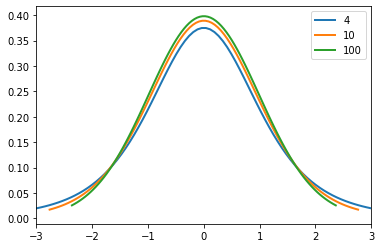

In [2]:
# Student(df) density curves for various df
from scipy.stats import t
f, ax1 = plt.subplots()
for df in [4, 10, 100]:
    x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
    rv = t(df)
    ax1.plot(x, rv.pdf(x), lw=2, label=df)
ax1.set_xlim(-3, 3) 
ax1.legend();

When sampling from a Normal distribution:
<br>
$Z = \frac{\bar{X} - \mu}{sd(\bar{X})} = \frac{\bar{X} - \mu}{\sigma/\sqrt{n})}$

If we standardize $\bar{X}$ using its standard error instead of its standard deviation, we form:
<br>
$T = \frac{\bar{X} - \mu}{se(\bar{X})} = \frac{\bar{X} - \mu}{S_X/\sqrt{n})}$

where the difference between Z and T is the substitution of the population standard deviation with the sample standard deviation. This makes the T distribution more variable than that of Z.

$T = \frac{\bar{X} - \mu}{se(\bar{X})}$ ~ Student(df = n-1)

Note how smaller n (df) have a wider distribution. The result of this is that for the limits to include $\mu$ 95% of the time, you need to take a bigger critical t value.

**Q: If you had an degrees of freedom of 5, would your critical t value by below or above 1.96 to have a 95% confidence interval?**

### The usefulness of Student's t-distribution

If we want to preserve the same probability that the interval captures for the population mean, we typically have to take a wider interval (larger number of standard errors on either side of $\bar{x}) for smaller samples than we would for larger samples.

The theory described above and the strict application of Student's t-distribution for $T = (\bar{X}-\mu)/se(\bar{X})$ apply only to data sampled from a Normal distribution. If the methods derived from the mathematical theory stopped working as soon as we got away from the Normal distribution, the theoretical result that T has a Student distribution would have no practical relevance because in practice we never know that we have Normally distributed data. How useful is the theory in practice?

In large samples, the CLT tells us that, even for data sampled from non-Normal distributions, the distribution of $T$ is approximately Normal(0,1) which for large df is virtually identical to Student(df).

How applicable is the t-distribution for small samples from non-Normal distributions? For **inferences about means**, computer simulations have shown that some methods derived from using a Student's t-distribution for $T = (\bar{X} - \mu)/se(\bar{X})$ work well in small samples, even when sampling from distributions that are severely not normal.

Most of the methods described in the book for making formal statistical intferences from data can be unified (conceptually and notationally) by thinking in terms of taking an estimate $\hat{\theta}$ and treating the distribution of

$T = \frac{\hat{\Theta}-{\theta}}{se(\hat{\Theta}} = \frac{Estimate - True\ value}{Standard\ error}$

as being Student(df). We have seen the basis for doing this in the context of using a sample mean $\bar{x}$ to estimate a population mean $\mu$. Similar considerations apply when estimating the difference between two means or certain estimates in regression.

The large sample methods we have described for making **inferences about proportions** cannot be made to apply to small samples by a device as simple as replacing the standard Normal distribution for T by Student's t-distribution. **Very different ideas are required for handling small-sample data about proportions.** Nevertheless, **the large sample methods for proprotions can be brought under the same notational and conceptual umbrella.**

We shall make heavy use of Student's t-distribution in subsequent chapters. How well the resulting techniques work in practice depends on the type of estimator being used, how the data have been collected, and how much data there is.

### Python and scipy.stats code for getting T distribution probabilities


| method | description |
|--------|-------------|
| pdf(x, df, loc=0, scale=1)  | Probability density function. |
|cdf(x, df, loc=0, scale=1) |  Cumulative distribution function. |
| ppf(q, df, loc=0, scale=1) | Percent point function (inverse of cdf — percentiles). |

In [2]:
# Student(df) density curves for various df
from scipy.stats import t

#### Probability distribution function - not sure how to interpret this yet

In [33]:
t.pdf(x=2, df=10000)

0.05400041216036306

In [26]:
t.pdf(x=1.5, df=7)

0.12626306128596107

#### Cumulative distribution function (lower-tail probability)

In [28]:
t.cdf(x=1.96, df=1000)

0.9748634075221256

In [29]:
t.cdf(x=1.5, df=7)

0.911350756505015

#### Getting the t-statistic back from the lower tail probability

In [133]:
t.ppf(q=0.975, df=100000)

1.9599877075346093

<IPython.core.display.Javascript object>

In [134]:
t.ppf(q=0.975, df=10)

2.2281388519649385

<IPython.core.display.Javascript object>

In [31]:
t.ppf(q=0.91135, df=7)

1.4999940085216368

In [5]:
t.ppf(q=0.1299, df=100)

-1.1332953810813662

## Unit review exercises

### Q. 13


In [1]:
df_caps = pd.DataFrame(
    {"downtown": [407, 174], "uni": [236, 29], "biz_school": [319, 107]},
    index=["no_obs", "cap_backwards"],
)
df_caps

,downtown,uni,biz_school
no_obs,407,236,319
cap_backwards,174,29,107


**a. Calculate a two-standard-error interval for the true proportion of baseball cap wearers downtown who wear their caps backwards**

In [125]:
p_dt = df_caps.loc["cap_backwards", "downtown"] / df_caps.loc["no_obs", "downtown"]

se_dt = np.sqrt(((p_dt) * (1 - p_dt)) / df_caps.loc["no_obs", "downtown"])

print("proportion: ", p_dt, "se: ", se_dt)

proportion:  0.4275184275184275 se:  0.02452228699240917


<IPython.core.display.Javascript object>

In [126]:
lower_bound = p_dt - 2 * se_dt
upper_bound = p_dt + 2 * se_dt
print(lower_bound, upper_bound)

0.3784738535336092 0.4765630015032458


<IPython.core.display.Javascript object>

**b. Is there evidence that downtown cap wearers are more likely to wear their caps backwards than business-school cap wearers? (How many SEs are the estimates apart?)**

In [127]:
p_bs = df_caps.loc["cap_backwards", "biz_school"] / df_caps.loc["no_obs", "biz_school"]

<IPython.core.display.Javascript object>

In [128]:
se_bs = np.sqrt((p_bs * (1 - p_bs)) / df_caps.loc["no_obs", "biz_school"])
(p_bs - 2 * se_bs, p_bs + 2 * se_bs)

(0.2825538694822773, 0.3882925255020487)

<IPython.core.display.Javascript object>

In [129]:
p_diff = p_dt - p_bs
p_diff

0.09209523002626452

<IPython.core.display.Javascript object>

In [130]:
se_diff = np.sqrt(se_dt ** 2 + se_bs ** 2)
se_diff

0.03605737123518991

<IPython.core.display.Javascript object>

In [131]:
(p_diff - 2 * se_diff, p_diff + 2 * se_diff)

(0.019980487555884704, 0.16420997249664432)

<IPython.core.display.Javascript object>

In [132]:
p_diff / se_diff

2.554130455755047

<IPython.core.display.Javascript object>

**People downtown are more likely to wear their hats backward. The differences are about 2.55 standard errors apart.**

**c. Separate 2 SE intervals for the true proportions in each of the three locations are plotted. The intervals for downtown wearers overlap with business school wearers. Does it conflict with conclusions?**

No it doesn't because the standard error of the difference is smaller than the sum of the individual standard errors.

# --- 